In [6]:
%%bq query
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


In [7]:
%%bq query --name total_births
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

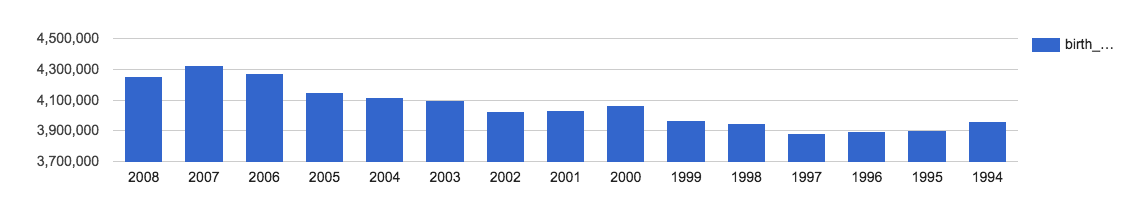

In [8]:
%chart columns --data total_births --fields year,birth_count

In [9]:
%%bq query --name births_by_weekday
SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `publicdata.samples.natality`
WHERE wday IS NOT NULL
GROUP BY weekday
ORDER BY weekday ASC

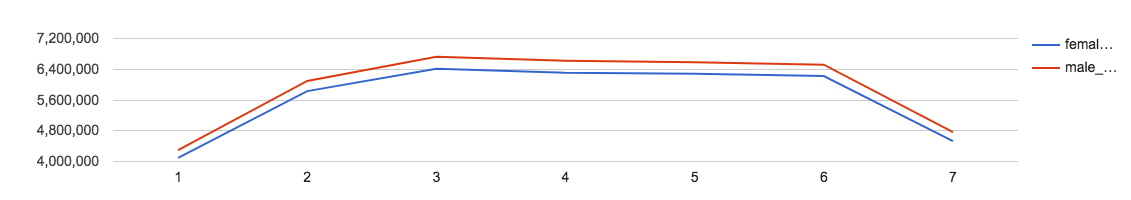

In [10]:
%chart line --data births_by_weekday --fields weekday,female_births,male_births

In [11]:
import google.datalab.bigquery as bq
import pandas as pd

In [12]:
total_births = bq.Query('SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count FROM `publicdata.samples.natality` GROUP BY year ORDER BY year DESC LIMIT 15')
df = total_births.execute(output_options=bq.QueryOutput.dataframe()).result()
df.head(10)

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


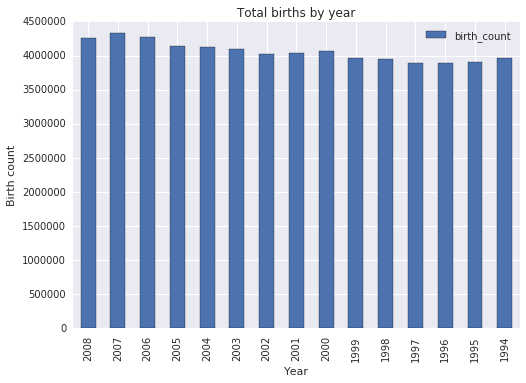

In [13]:
ax = df.plot(kind='bar',x='year',title='Total births by year')
ax.set_xlabel('Year')
ax.set_ylabel('Birth count')

In [14]:
births_by_weekday = bq.Query('SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births FROM `publicdata.samples.natality` WHERE wday IS NOT NULL GROUP BY weekday ORDER BY weekday ASC')
df2 = births_by_weekday.execute(output_options=bq.QueryOutput.dataframe()).result()

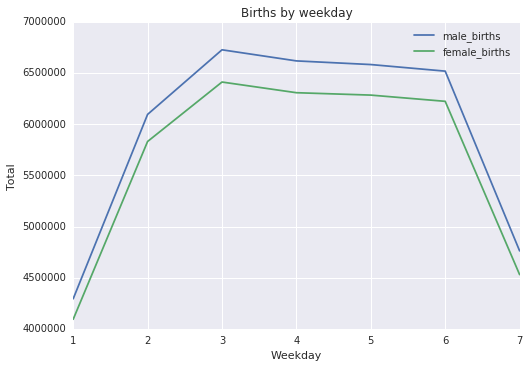

In [15]:
df2 = births_by_weekday.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df2.plot(kind='line',x='weekday',title='Births by weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total')